---
# Molecular Dynamics Simulations in Python
---

Adapted from https://github.com/klyshko/md_python/blob/master/Lecture.ipynb

## 1. Introduction <a id='l_overview'></a>

This lecture was created as part of a CPS Teaching Fellowship. We are introducing a novel approach to study advanced scientific programming. The goal of today's lecture is to present Molecular Dynamics (MD) simulations of macromolecules. We will learn how to run these simulations using the Python programmming language. We will use many `numpy` functions and a few new modules, such as `openmm` for MD simulations. These are the important concepts that we will cover:

- [Newton's Laws of Motion](#l_newton) 
- [Proteins -- Different Levels of Structure](#l_proteins)
- [Molecular Mechanics](#l_mm)
- [MD Simulations of Proteins](#l_md)


## 2. Newton's Laws of Motion <a id='l_newton'></a>

Newton's 2nd law connects the kinematics (movements) of a body with its mechanics (total force acting on it) and defines the dynamic evolution of its position: 

$$m\frac{d^2r(t)}{dt^2} = F = - \nabla{U(r)},$$

where $m$ is the mass, $r$ is the position, $F$ is the force and $U(r)$ is the potential energy, which depends only on the position of the body. 
If one knows the forces acting upon the body, one can find the position of the body at any moment $r(t)$, i.e. predict its dynamics. This can be done by solving Newton's equation of motion. It is a second order ODE that can be solved analytically for a few simple cases: constant force, harmonic oscillator, periodic force, drag force, etc.
However, a more general approach is to use computers in order to solve the ODE numerically.

While we now have a basic knowledge of the purpose and methodology of simulations, we still need to understand what proteins are and why they are important.

---
## 3. Proteins, structure and functions <a id='l_proteins'></a>
---
<img src="pics/Protein_structure.png" width="400" align="right">

[Protein structure](https://en.wikipedia.org/wiki/Protein_structure) is the three-dimensional arrangement of atoms in a protein, which is a chain of amino acids. Proteins are polymers – specifically polypeptides – formed from sequences of 20 types of amino acids, the monomers of the polymer. A single amino acid monomer may also be called a residue, indicating a repeating unit of a polymer. To be able to perform their biological function, proteins fold into one or more specific spatial conformations driven by a number of non-covalent interactions such as:

- hydrogen bonding 
- ionic interactions 
- Van der Waals forces
- hydrophobic packing 

To understand the functions of proteins at a molecular level, it is often necessary to determine their three-dimensional structure using techniques such as X-ray crystallography, NMR spectroscopy, and others.

### 3.1 Levels of structure:

**Primary structure** of a protein refers to the sequence of amino acids in the polypeptide chain.

**Secondary structure** refers to highly regular local sub-structures of the actual polypeptide backbone chain. There are two main types of secondary structure: the α-helix and the β-strand or β-sheets.

**Tertiary structure** refers to the three-dimensional structure of monomeric and multimeric protein molecules. The α-helixes and β-sheets are folded into a compact globular structure. 

**Quaternary structure** is the three-dimensional structure consisting of two or more individual polypeptide chains (subunits) that operate as a single functional unit (multimer).


### 3.2 Functions:

- *Antibodies* - bind to specific foreign particles, ex: IgG 
- *Enzymes* - speed up chemical reactions, ex: Lysozyme
- *Messengers* - transmit signals, ex: Growth hormone 
- *Structural components* - support for cells, ex: Tubulin
- *Transport/storage* - bind and carry small molecules, ex: Hemoglobin


**Lysozyme** is a protein-enzyme (found in tears, saliva, mucus and egg white) that is a part of the innate immune system with antimicrobial activity characterized by the ability to damage the cell wall of bacteria. Bacteria have polysaccharides (sugars) in their cell wall, that bind to the groove, and lysozyme cuts the bond and destroys bacteria.  

|  ![Protein Sequence in DNA](pics/LysozymeSequence.png) | ![Protein Structure](pics/LysozymeStructure.gif) | ![Protein Strucure with Sugar](pics/LysozymeRock.gif) |
|:-:|:-:|:-:|
|  Sequence | Structure | Function  |

Figure credit: [C.Ing](https://github.com/cing/HackingStructBiolTalk) and [wikipedia](https://en.wikipedia.org/wiki/Protein_structure)


---
## 4. Molecular Mechanics <a id='l_mm'></a>
---

Since we now know what proteins are and why these molecular machines are important, we consider the method to model them. The basic idea is to create the same kind of approach as we used in the 3-body simulation. Now, our system consists of thousands particles (atoms of the protein plus atoms of surrounding water) and they all are connected via a complex potential energy function.

An all-atom potential energy function $V$ is usually given by the sum of the bonded terms ($V_b$) and non-bonded terms ($V_{nb}$), i.e.

$$V = V_{b} + V_{nb},$$

where the bonded potential includes the harmonic (covalent) bond part, the harmonic angle and
the two types of torsion (dihedral) angles: proper and improper. As it can be seen, these functions are mostly harmonic potentials 

$$V_{b} = \sum_{bonds}\frac{1}{2}K_b(b-b_0)^2 + \sum_{angles}K_{\theta}(\theta-\theta_0)^2 + \sum_{dihedrals}K_{\phi}(1-cos(n\phi - \phi_0)) + \sum_{impropers}K_{\psi}(\psi-\psi_0)^2$$

For example, $b$ and $\theta$ represent the distance between two atoms and the angle between two
adjacent bonds; $\phi$ and $\psi$ are dihedral (torsion) angles. These can be evaluated for all the
atoms from their current positions. Also, $K_b$, $K_\theta$, $K_\phi$, and $K_\psi$ are the spring constants, associated
with bond vibrations, bending of bond angles, and conformational fluctuations in dihedral and
improper angles around some equilibrium values $b_0$, $\theta_0$, $\phi_0$, and $\psi_0$, respectively. 

The non-bonded part of the potential energy function is represented by the electrostatic and van der Waals potentials, i.e.

$$V_{nb} = \sum_{i,j}\left(\frac{q_{i}q_{j}}{4\pi\varepsilon_{0}\varepsilon r_{ij}} + \varepsilon_{ij}\left[\left(\frac{\sigma^{min}_{ij}}{r_{ij}}\right)^{12}-2\left(\frac{\sigma^{min}_{ij}}{r_{ij}}\right)^{6}\right]\right)$$

where $r_{ij}$ is the distance between two interacting atoms, $q_i$ and $q_j$ are their electric charges; $\varepsilon$ and
$\varepsilon_0$ are electric and dielectric constant; $\varepsilon_{ij} = \sqrt{\varepsilon_i\varepsilon_j}$ and
$\sigma_{ij} = \frac{\sigma_i + \sigma_j}{2}$ are van der Waals parameters for atoms $i$ and $j$.

**Importantly, each force field has its own set of parameters, which are different for different types of atoms.**

![](pics/ff.png)


## 5. Molecular dynamics of proteins <a id='l_md'></a>
---

[**Molecular dynamics (MD)**](https://en.wikipedia.org/wiki/Molecular_dynamics) is a computer simulation method for studying the physical movements of atoms and molecules, i.e. their dynamical evolution. 

In the most common version, the trajectories of atoms and molecules are determined by numerically solving Newton's equations of motion for a system of interacting particles, where forces between the particles and their potential energies are often calculated using  [molecular mechanics force fields](#l_mm). 



Now with all that intellectual equipment, we can start running legit Molecular Dynamics simulations. All we need is an initial structure of the protein and software that computes its dynamics efficiently.


### Procedure:
1. Load initial coordinates of protein atoms (from `*.pdb` file)
2. Choose force field parameters (in potential function V from section 5).
3. Choose parameters of the experiment: temperature, pressure, box size, solvation, boundary conditions
4. Choose integrator, i.e. algorithm for solving equation of motion
5. Run simulation, save coordinates time to time (to `*.dcd` file).
6. Visualize the trajectory 
7. Perform the analysis

These are the Python libraries we are going to need today:

1. [nglview](http://nglviewer.org/nglview/latest/index.html#installation) - module to visualize molecules
2. [mdanalysis](https://www.mdanalysis.org/pages/installation_quick_start/) - module to analyze MD trajectory
3. [openmm](http://docs.openmm.org/latest/userguide/application.html#installing-openmm) - module to run MD simulation

In [1]:
from openmm.app import *
from openmm import *
from simtk.unit import *
import MDAnalysis as md
import nglview as ng
import numpy as np
from sys import stdout
import matplotlib.pyplot as plt

These files are already preloaded to your `data` folder.

In [2]:
pdb0_file = 'data/villin_water.pdb'
pdb1_file = 'data/polyALA.pdb'
pdb2_file = 'data/polyGLY.pdb'
pdb3_file = 'data/polyGV.pdb'

PDB files contain 3D structures of proteins that were resolved by experimental techniques. They can be downloaded from [ProteinDataBank](https://www.wwpdb.org/). Here we can see what a `.pdb` file looks like: 

In [3]:
file0 = open(pdb0_file, 'r')
counter = 0
for line in file0:
    if counter < 10:
        print(line)
    counter += 1

REMARK    GENERATED BY TRJCONV

HEADER    Villin N68H in explicit water

REMARK    THIS IS A SIMULATION BOX

CRYST1   49.163   45.981   38.869  90.00  90.00  90.00 P 1           1

MODEL        0

ATOM      1  N   LEU     1      25.160  14.160  19.440  1.00  0.00

ATOM      2  H1  LEU     1      24.350  13.730  19.870  1.00  0.00

ATOM      3  H2  LEU     1      25.980  13.680  19.760  1.00  0.00

ATOM      4  H3  LEU     1      25.180  15.100  19.810  1.00  0.00

ATOM      5  CA  LEU     1      25.090  13.920  17.980  1.00  0.00



We can look at the protein via `nglview`:

In [5]:
u = md.Universe(pdb0_file)
ng.show_mdanalysis(u, gui=True)

/Applications/anaconda3/lib/python3.8/site-packages/MDAnalysis/topology/PDBParser.py:317: UserWarning: Element information is missing, elements attribute will not be populated. If needed these can be guessed using MDAnalysis.topology.guessers.
  warnings.warn("Element information is missing, elements attribute "


NGLWidget()

### Example 5.1. MD simulation of protein folding into alpha-helix
---

Run a simulation of fully extended polyalanine `polyALA.pdb` for 400 picoseconds in a vacuo environment with T=300 K and see if it can fold to any secondary  structure:

In [6]:
### 1.loading initial coordinates
pdb = PDBFile(pdb3_file) 

### 2.choosing a forcefield parameters
ff = ForceField('amber10.xml')  
system = ff.createSystem(pdb.topology, nonbondedMethod=CutoffNonPeriodic)

### 3. Choose parameters of the experiment: temperature, pressure, box size, solvation, boundary conditions, etc
temperature = 300*kelvin
frictionCoeff = 1/picosecond
time_step = 0.002*picoseconds
total_steps = 400*picoseconds / time_step

### 4. Choose an algorithm (integrator)
integrator = LangevinIntegrator(temperature, frictionCoeff, time_step)

### 5. Run simulation, saving coordinates time to time:

### 5a. Create a simulation object
simulation = Simulation(pdb.topology, system, integrator)
simulation.context.setPositions(pdb.positions)

### 5b. Minimize energy
simulation.minimizeEnergy()

### 5c. Save coordinates to dcd file and energies to a standard output console:
simulation.reporters.append(DCDReporter('data/polyALA_traj.dcd', 1000))
simulation.reporters.append(StateDataReporter(stdout, 5000, step=True, potentialEnergy=True,\
                                              temperature=True, progress=True, totalSteps = total_steps))

### 5d. Run!
simulation.step(total_steps)

#"Progress (%)","Step","Potential Energy (kJ/mole)","Temperature (K)"
2.5%,5000,3862.0302734375,294.00907002322356
5.0%,10000,3734.710205078125,291.6074435962248
7.5%,15000,3872.70947265625,325.0983753997206
10.0%,20000,3726.1328125,304.73461878754574
12.5%,25000,3704.8330078125,286.15627220797023
15.0%,30000,3657.743896484375,299.72208148341366
17.5%,35000,3633.70947265625,302.05193521632
20.0%,40000,3591.953125,309.86868805049176
22.5%,45000,3708.30712890625,306.1899060993388
25.0%,50000,3595.303466796875,295.0346073047487
27.5%,55000,3454.2294921875,297.9165468406254
30.0%,60000,3447.47265625,326.47862794622813
32.5%,65000,3466.40869140625,302.33651350786715
35.0%,70000,3370.708740234375,294.78279647485965
37.5%,75000,3321.74365234375,323.5594563747384
40.0%,80000,3349.20556640625,297.8777916110915
42.5%,85000,3300.288818359375,288.90231896898774
45.0%,90000,3296.478759765625,288.4815303767583
47.5%,95000,3142.74560546875,333.51161108235243
50.0%,100000,3389.257080078125,283.1843015

**Visualization**

Let's look at the trajectory:

In [7]:
### 6. Visualization
sys = md.Universe(pdb3_file, 'data/polyALA_traj.dcd')
ng.show_mdanalysis(sys, gui=True)

NGLWidget(max_frame=199)

### Example 5.2. Analysis of MD trajectory.
---

**End-to-end distance**:

In [8]:
### analysis of end-to-end distance

## choose terminal atoms 
N_terminus = sys.select_atoms('resid 1 and name N')
C_terminus = sys.select_atoms('resid 25 and name C')

## go through the whole trajectory and compute distance between them for every frame
dist = []
for frame in sys.trajectory:
    dist.append(np.linalg.norm(N_terminus.positions - C_terminus.positions))

## the result is in the dist array    
dist = np.array(dist) 

**Number of hydrogen bonds:**

In [9]:
from MDAnalysis.analysis import hydrogenbonds ## module for analysis of hydrogen bonds

## compute information about hbonds and write it to the 'hb.timeseries'
hb = hydrogenbonds.hbond_analysis.HydrogenBondAnalysis(sys)
hb.run()

## print information for the first 10 frames
for frame in hb.timeseries[:10]:
    print(frame)

NoDataError: This Universe does not contain charge information

In [10]:
## go through the 'hb.timeseries' file and calculate number of bonds for each time frame 
## (it's the length of array frame)
hb_number = []
for frame in hb.timeseries:
    hb_number.append(len(frame))
    
## the result is in the number array     
hb_number = np.array(hb_number)

AttributeError: 'HydrogenBondAnalysis' object has no attribute 'timeseries'

We can plot end-to-end distance and number of hydrogen bonds vs time:

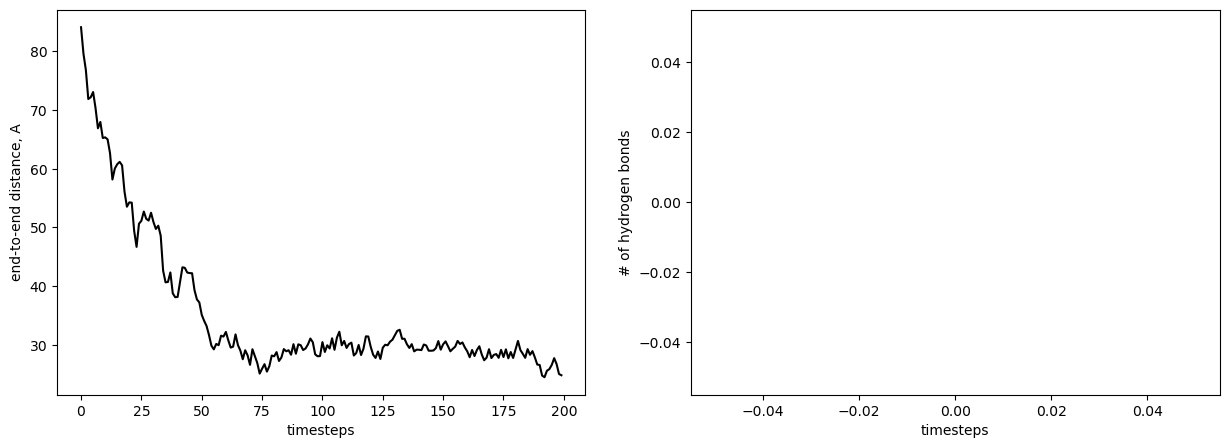

In [11]:
plt.figure(figsize=(15,5))

plt.subplot(121)
plt.plot( dist, '-k' )
plt.xlabel('timesteps')
plt.ylabel('end-to-end distance, A')

plt.subplot(122)
plt.plot(hb_number, 'g-')
plt.ylabel('# of hydrogen bonds')
plt.xlabel('timesteps')

plt.show()

**[Ramachandran plot](https://en.wikipedia.org/wiki/Ramachandran_plot):**

/Applications/anaconda3/lib/python3.8/site-packages/MDAnalysis/analysis/dihedrals.py:421: UserWarning: Cannot determine phi and psi angles for the first or last residues
  warnings.warn("Cannot determine phi and psi angles for the first "


<Figure size 640x480 with 0 Axes>

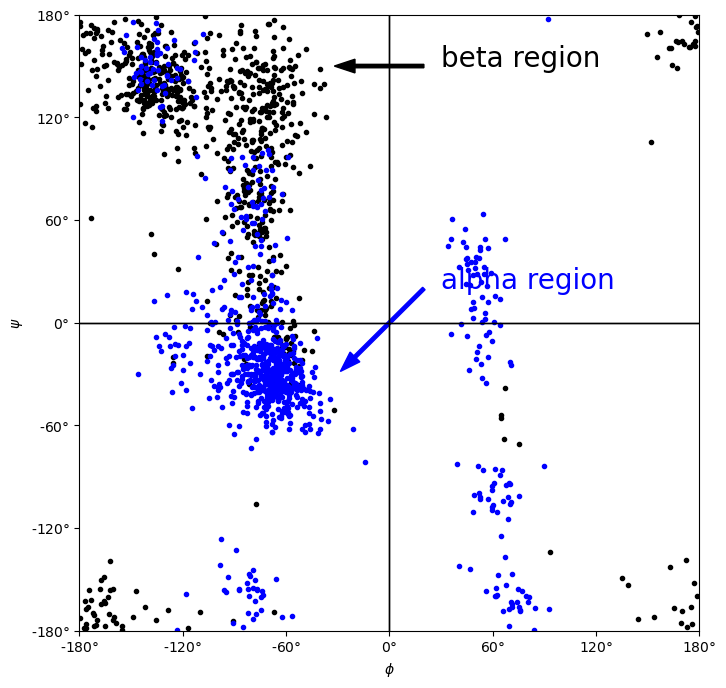

In [12]:
from MDAnalysis.analysis import dihedrals  ## module for dihedrals analysis
plt.clf()
ram1 = dihedrals.Ramachandran(sys).run(0,30) ## analyse for first 30 steps (black color)
ram2 = dihedrals.Ramachandran(sys).run(170,200) ## analyse for last 30 steps (blue color)

## ramachandran plot
fig, ax = plt.subplots(figsize=(8,8))
ram1.plot(ax=ax, color='k', marker='.')
ram2.plot(ax=ax, color='b', marker='.')
ax.arrow(20, 20, -40, -40, width=2, head_width=8, head_length=12, fc='b', ec='b')
ax.text(30, 20, 'alpha region', color='blue', fontsize=20)
ax.arrow(20, 150, -40, 0, width=2, head_width=8, head_length=12, fc='k', ec='k')
ax.text(30, 150, 'beta region', fontsize=20)
plt.show()

<hr>

## Session 2 Exercise. Your first MD simulation.

Read through section 5 and example 5.1-5.2 of the lecture. Run 3 simulations of fully extended polyglycine `data/polyGLY.pdb` for 1 nanosecond in vacuum (no water) with $T_1=100 K$, $T_2=300 K$, and $T_3=500 K$ and visually compare how extended the final structure is at each temperature.  

In [ ]:
# Similar to Example 5.1

## Assessment Exercise. MD simulation analysis.

Perform a quantitative analysis of the trajectories you obtained in Exercise 3. Use, for example, the end-to-end distance or the function `radius_of_gyration()` from the `MDAnalysis` module, which returns the [radius of gyration](https://en.wikipedia.org/wiki/Radius_of_gyration) of the protein.

In [ ]:
# Similar to example 5.2